# 10

In [1]:
from sklearn.datasets import fetch_olivetti_faces

In [2]:
olivetti = fetch_olivetti_faces()
X = olivetti.data
y = olivetti.target

In [3]:
X.shape, y.shape

((400, 4096), (400,))

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create stratified splits for train/validation/test
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_val_idx, test_idx = next(sss1.split(X, y))

# Split the remaining data into train and validation
X_train_val, y_train_val = X[train_val_idx], y[train_val_idx]
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)  
train_idx, val_idx = next(sss2.split(X_train_val, y_train_val))

# Create final splits
X_train, X_val, X_test = X_train_val[train_idx], X_train_val[val_idx], X[test_idx]
y_train, y_val, y_test = y_train_val[train_idx], y_train_val[val_idx], y[test_idx]

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Train set: (240, 4096), (240,)
Validation set: (80, 4096), (80,)
Test set: (80, 4096), (80,)


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Find the best number of clusters using elbow method and silhouette score
k_range = range(5, 200, 5)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_train)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_train, kmeans_temp.labels_))

# Find optimal k based on highest silhouette score
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")

# Train final model with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_train)

Optimal number of clusters: 90


KMeans(n_clusters=90, n_init=10, random_state=42)

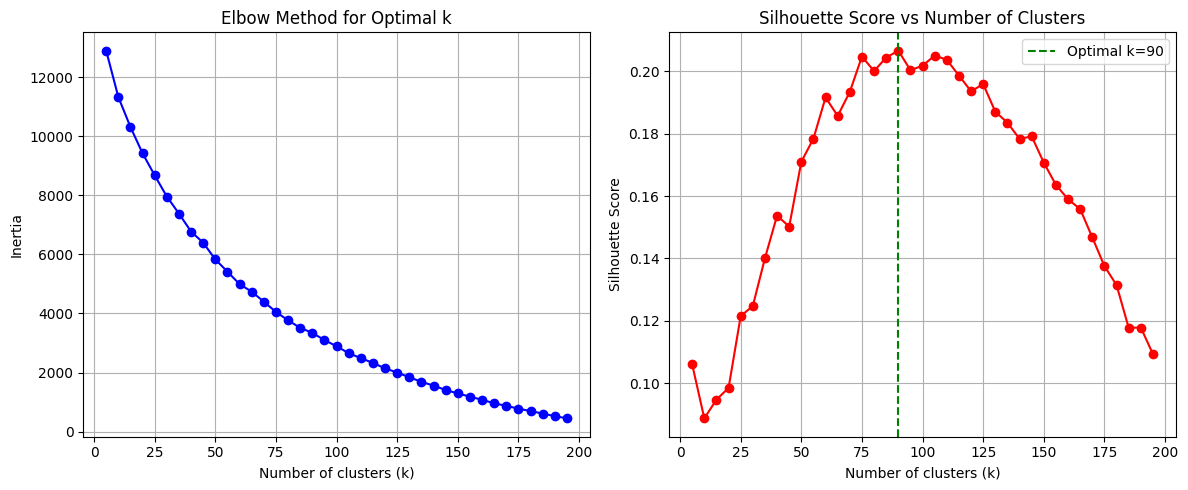

In [6]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot elbow curve
ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

# Plot silhouette scores
ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.axvline(x=optimal_k, color='g', linestyle='--', label=f'Optimal k={optimal_k}')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs Number of Clusters')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [9]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

Cluster 0


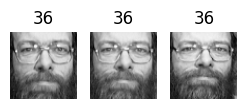

Cluster 1


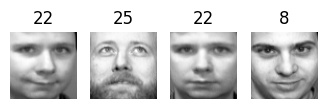

Cluster 2


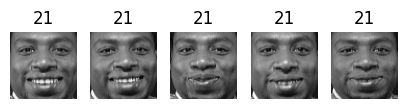

Cluster 3


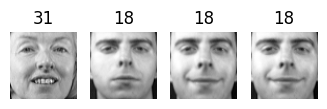

Cluster 4


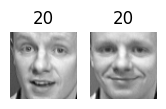

Cluster 5


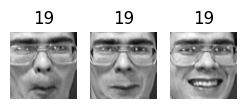

Cluster 6


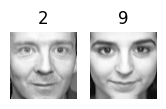

Cluster 7


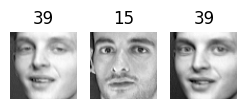

Cluster 8


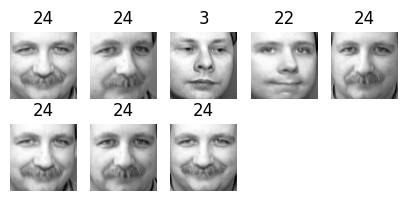

Cluster 9


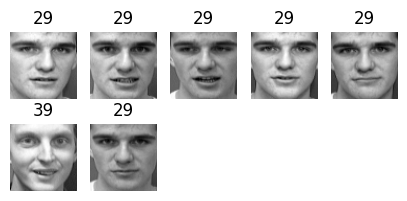

Cluster 10


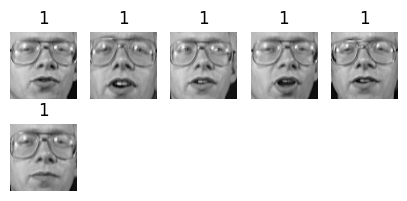

Cluster 11


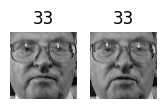

Cluster 12


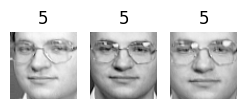

Cluster 13


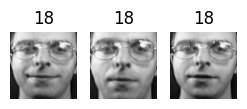

Cluster 14


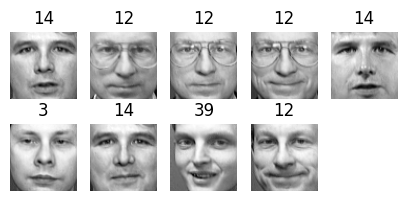

Cluster 15


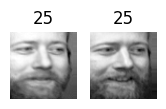

Cluster 16


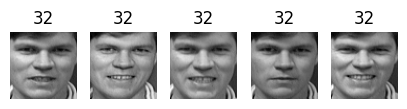

Cluster 17


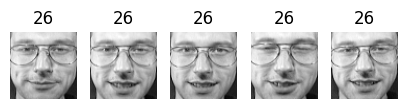

Cluster 18


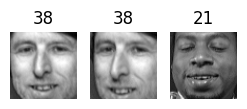

Cluster 19


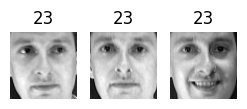

Cluster 20


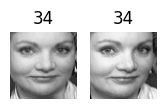

Cluster 21


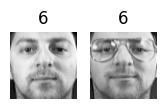

Cluster 22


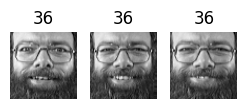

Cluster 23


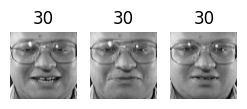

Cluster 24


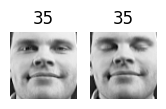

Cluster 25


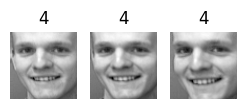

Cluster 26


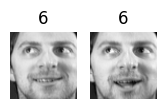

Cluster 27


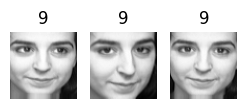

Cluster 28


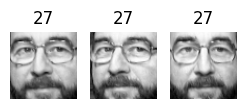

Cluster 29


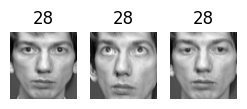

Cluster 30


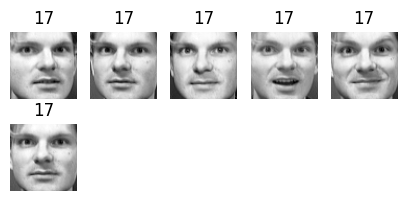

Cluster 31


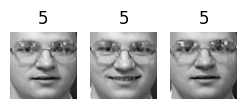

Cluster 32


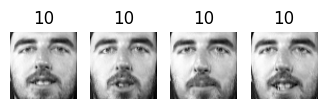

Cluster 33


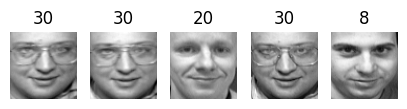

Cluster 34


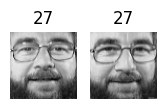

Cluster 35


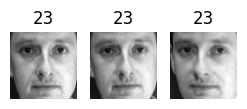

Cluster 36


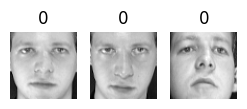

Cluster 37


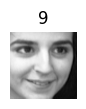

Cluster 38


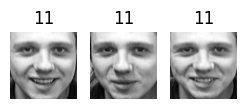

Cluster 39


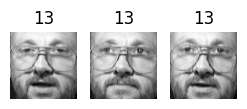

Cluster 40


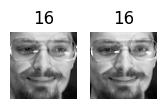

Cluster 41


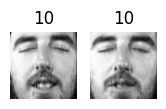

Cluster 42


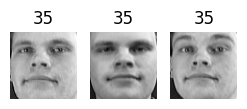

Cluster 43


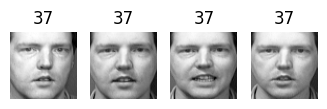

Cluster 44


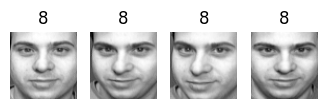

Cluster 45


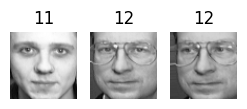

Cluster 46


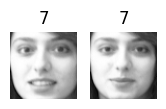

Cluster 47


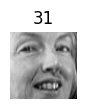

Cluster 48


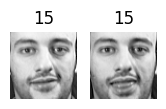

Cluster 49


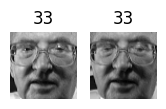

Cluster 50


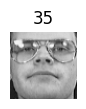

Cluster 51


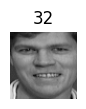

Cluster 52


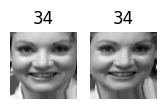

Cluster 53


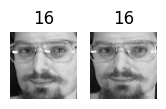

Cluster 54


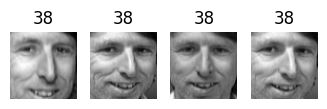

Cluster 55


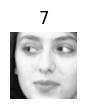

Cluster 56


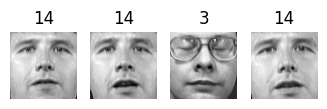

Cluster 57


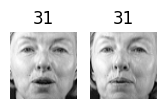

Cluster 58


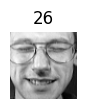

Cluster 59


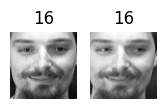

Cluster 60


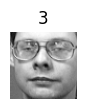

Cluster 61


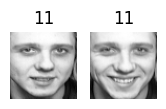

Cluster 62


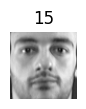

Cluster 63


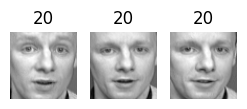

Cluster 64


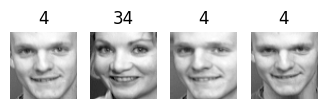

Cluster 65


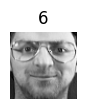

Cluster 66


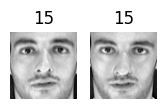

Cluster 67


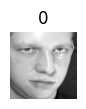

Cluster 68


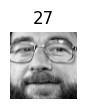

Cluster 69


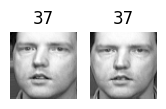

Cluster 70


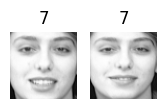

Cluster 71


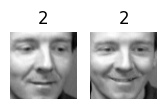

Cluster 72


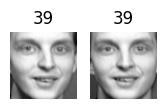

Cluster 73


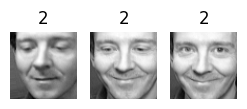

Cluster 74


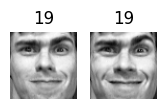

Cluster 75


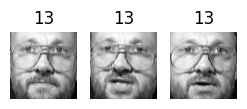

Cluster 76


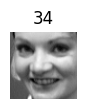

Cluster 77


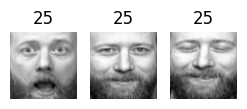

Cluster 78


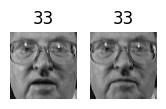

Cluster 79


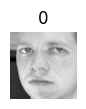

Cluster 80


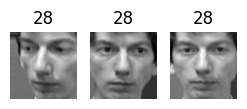

Cluster 81


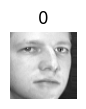

Cluster 82


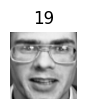

Cluster 83


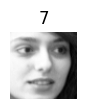

Cluster 84


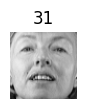

Cluster 85


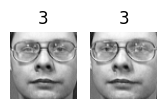

Cluster 86


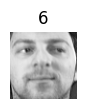

Cluster 87


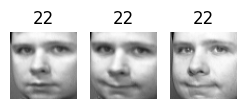

Cluster 88


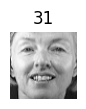

Cluster 89


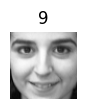

In [10]:
import numpy as np

for cluster_id in np.unique(kmeans.labels_):
    print("Cluster", cluster_id)
    in_cluster = kmeans.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)


# 11

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
rf.score(X_val, y_val)

0.925

In [13]:
X_train_reduced = kmeans.transform(X_train)
X_val_reduced = kmeans.transform(X_val)
X_test_reduced = kmeans.transform(X_test)

rf_reduced = RandomForestClassifier(random_state=42)
rf_reduced.fit(X_train_reduced, y_train)

RandomForestClassifier(random_state=42)

In [14]:
rf_reduced.score(X_val_reduced, y_val)

0.8375

In [17]:
rf_reduced.n_estimators

100

In [18]:
# Concatenate original features with reduced features
X_train_combined = np.concatenate([X_train, X_train_reduced], axis=1)
X_val_combined = np.concatenate([X_val, X_val_reduced], axis=1)
X_test_combined = np.concatenate([X_test, X_test_reduced], axis=1)

print(f"Original feature shape: {X_train.shape}")
print(f"Reduced feature shape: {X_train_reduced.shape}")
print(f"Combined feature shape: {X_train_combined.shape}")

Original feature shape: (240, 4096)
Reduced feature shape: (240, 90)
Combined feature shape: (240, 4186)


In [19]:
rf_combined = RandomForestClassifier(random_state=42)
rf_combined.fit(X_train_combined, y_train)

RandomForestClassifier(random_state=42)

In [20]:
rf_combined.score(X_val_combined, y_val)

0.9375

# 12

In [89]:
from sklearn.decomposition import PCA  

In [90]:
pca = PCA(n_components=0.99, random_state=42)
pca.fit(X_train)

X_train_reduced = pca.transform(X_train)
X_val_reduced = pca.transform(X_val)
X_test_reduced = pca.transform(X_test)

In [91]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_reduced)

In [92]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

In [93]:
y_gen_faces

array([ 1,  1,  2,  7,  8,  9,  9, 11, 12, 17, 24, 24, 25, 30, 30, 33, 33,
       33, 34, 39])

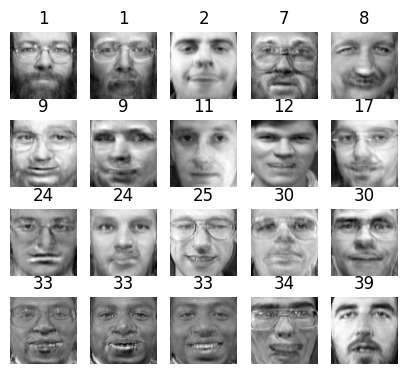

In [94]:
plot_faces(gen_faces, y_gen_faces)

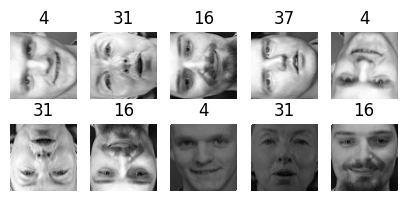

In [95]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [96]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [97]:
gm.score_samples(X_bad_faces_pca)

array([-31622235.36759083, -28805831.40807744, -28466713.29986149,
       -47074655.70987753, -30693101.55656671, -44126772.57618926,
       -49665561.50847459, -96722920.05002096, -87986955.04169713,
       -99667273.66387056])

In [98]:
gm.score_samples(X_train_reduced)

array([ 987.10187126, 1016.72538763, 1002.06856557,  994.1773529 ,
       1001.18341826, 1024.39612912,  960.18929439,  943.74982683,
        974.44824649,  923.09647664, 1010.23807125, 1002.40825723,
        994.86483994,  994.86483975, 1025.62055344,  923.09648768,
       1023.99751895,  993.90917637,  923.09647834, 1024.83968639,
       1024.77765879, 1018.86782831,  980.68063492,  960.1892932 ,
        943.74981354,  960.18931384,  943.74981358, 1010.29924192,
       1025.02545903, 1016.72538757,  994.17735308, 1010.23807162,
       1001.18341831, 1040.44298664,  980.68063449,  993.90917638,
        960.18929242, 1026.01014782, 1040.72486693,  960.18929633,
        923.09648357,  923.09647931,  943.74980892,  994.17735305,
       1018.00340765,  923.09647907,  993.90917691,  923.09647606,
       1018.06818177, 1010.29924327,  994.02565679, 1002.40825725,
        993.90917857, 1034.46313602,  994.02565445, 1040.72486693,
       1001.18341835, 1001.18341916, 1016.6536242 ,  993.90917

# 13

In [99]:
X_train_reduced

array([[-3.9341657e+00, -4.0498195e+00,  1.2827753e+00, ...,
         1.8067287e-01, -1.3951582e-01, -1.4079201e-01],
       [-3.1260130e+00,  4.6684089e+00, -2.4889662e+00, ...,
        -3.7184566e-02, -5.2184843e-02, -4.4154361e-02],
       [ 9.7050703e-01,  2.5917985e+00,  2.9454584e+00, ...,
         5.8564898e-03,  1.5748031e-02, -6.2591486e-02],
       ...,
       [ 5.7618046e-01,  4.2609549e+00,  2.3228605e-01, ...,
        -1.0887851e-01, -1.6434155e-03, -1.5296498e-01],
       [-2.0304263e+00,  1.2000601e+00,  2.2286208e+00, ...,
         1.4277790e-01,  5.1626772e-02,  1.8024096e-01],
       [ 8.2630701e+00, -1.3433574e-01, -1.8174080e+00, ...,
        -2.3553774e-02,  2.5383738e-01, -3.4665875e-03]], dtype=float32)

In [100]:
# Compute reconstruction error for the training data
X_train_reconstructed = pca.inverse_transform(X_train_reduced)
reconstruction_error = np.mean((X_train - X_train_reconstructed) ** 2, axis=1)

print(f"Mean reconstruction error: {np.mean(reconstruction_error):.6f}")
print(f"Standard deviation: {np.std(reconstruction_error):.6f}")
print(f"Min reconstruction error: {np.min(reconstruction_error):.6f}")
print(f"Max reconstruction error: {np.max(reconstruction_error):.6f}")

Mean reconstruction error: 0.000191
Standard deviation: 0.000111
Min reconstruction error: 0.000013
Max reconstruction error: 0.000425


In [101]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
bad_reconstruction_error = np.mean((X_bad_faces - X_bad_faces_reconstructed) ** 2, axis=1)

print(f"Mean reconstruction error for bad faces: {np.mean(bad_reconstruction_error):.6f}")
print(f"Standard deviation: {np.std(bad_reconstruction_error):.6f}")
print(f"Min reconstruction error for bad faces: {np.min(bad_reconstruction_error):.6f}")
print(f"Max reconstruction error for bad faces: {np.max(bad_reconstruction_error):.6f}")

Mean reconstruction error for bad faces: 0.006107
Standard deviation: 0.003536
Min reconstruction error for bad faces: 0.000898
Max reconstruction error for bad faces: 0.009780


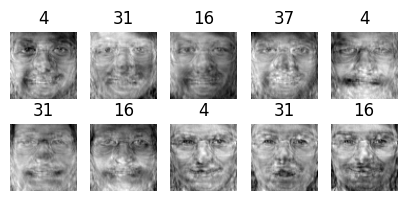

In [103]:
plot_faces(X_bad_faces_reconstructed, y_bad)